In [2]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from molecular_mpns.config import fig_dir

import os
os.chdir(fig_dir)

In [3]:
class WellSystem:
    
    def __init__(self,N,a,b,c,d0,tau):
        self.N = N
        self.a = a
        self.b = b
        self.c = c
        self.d0 = d0
        self.tau = tau
        
    def __repr__(self):
        return repr('Well System with' + self.N + ' atoms.')
    
    def _r(self,x):
        return cdist(x,x)
    
    def _potential(self,x):
        d = self._r(x)
        u = d - self.d0
        terms = 1/(2*self.tau)*(self.a*u + self.b*(u**2) + self.c*(u**4))
        np.fill_diagonal(terms,0)
        return terms.sum()
    
    def _gradient(self,x):
        d = self._r(x)
        u = d - self.d0
        
        dV = np.zeros((N,3))
        for i in range(self.N):
            grad = 0
            for j in range(self.N):
                dd = u[i,j]
                dx = (x[i]-x[j])/d[i,j] if d[i,j] > 0 else 0
                grad += (1/(2*self.tau))*(self.a+(2*self.b*dd)+4*self.c*(dd**3))*dx
            dV[i,:] = grad
            
        return dV

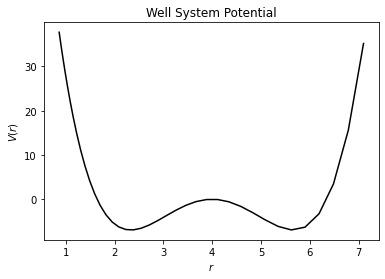

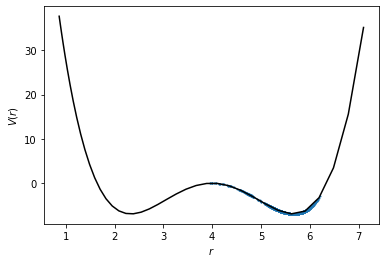

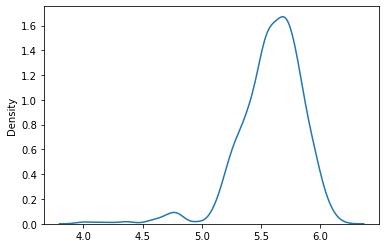

In [6]:
N = 2
a = 0
b = -5
c = 0.9
d0 = 4
tau = 1
system = WellSystem(N,a,b,c,d0,tau)

# plot potential
x = np.array([[0.,0.,0.],[0.5,0.5,0.5]])
res = 40
grid = np.linspace(0,0.18,res)
dists = np.zeros(res)
V = np.zeros(res)

initial = x[1:,]
for i,pt in enumerate(grid):
    x[1,:] = initial + pt
    d = system._r(x)
    d = d[0,1]
    potential = system._potential(x)
    dists[i],V[i] = d,potential
    
plt.plot(dists,V,color = 'black')
plt.xlabel('$r$')
plt.ylabel('$V(r)$')
plt.title('Well System Potential')
plt.savefig('wellsystem_potential.png')
plt.show()
plt.close()

# sample trajectory
M = 4000
beta = 2
dt = 1e-3
x = np.array([[0.,0.,0.],[np.sqrt(16/3),np.sqrt(16/3),np.sqrt(16/3)]])


traj = np.zeros((M,N,3))
d_traj = np.zeros(M)
pot_traj = np.zeros(M)

np.random.seed(42)
for i in range(M):
    x = x - system._gradient(x)*dt + np.sqrt(2*dt/beta)*np.random.randn(N,3)
    dist = system._r(x)
    pot = system._potential(x)
    
    traj[i] = x
    d_traj[i] = dist[0,1]
    pot_traj[i] = pot
    
plt.plot(dists,V,color = 'black')
plt.scatter(d_traj,pot_traj, s = 1)
plt.xlabel('$r$')
plt.ylabel('$V(r)$')
plt.show()
plt.close()

sns.kdeplot(d_traj)
plt.show()
plt.close()

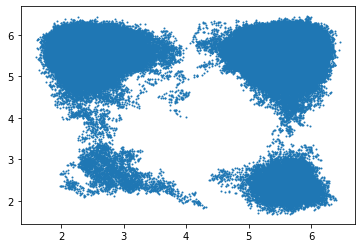

In [27]:
N = 3
a = 0
b = -5
c = 0.9
d0 = 4
tau = 1
system = WellSystem(N,a,b,c,d0,tau)

# sample trajectory
M = 1000000
beta = 2
dt = 1e-3
x = np.array([[0.,0.,0.],[np.sqrt(16/3),np.sqrt(16/3),np.sqrt(16/3)],[np.sqrt(16/3),np.sqrt(16/3),np.sqrt(16/3)]])


traj = np.zeros((M,N,3))
d_traj = np.zeros((M,2))
pot_traj = np.zeros(M)

np.random.seed(42)
for i in range(M):
    x = x - system._gradient(x)*dt + np.sqrt(2*dt/beta)*np.random.randn(N,3)
    dist = system._r(x)
    pot = system._potential(x)
    
    traj[i] = x
    d_traj[i] = dist[0,1:3]
    pot_traj[i] = pot
    
plt.scatter(d_traj[:,0],d_traj[:,1],s = 1)
plt.show()
plt.close()